In [27]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [28]:
image = cv2.imread('Lena.png')
image1= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [29]:
# rows,cols = image1.shape
# M = np.float32([[1,0,100],[0,1,50]])
# dst = cv2.warpAffine(image1,M,(cols,rows))
# plt.imshow(dst, cmap='gray')
# plt.show()

In [30]:
def translate(image,x,y):
    translated_image=np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if i+y<image.shape[0] and j+x<image.shape[1]:
                translated_image[i+y][j+x]=image[i][j]
    return translated_image

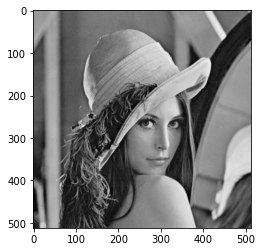

In [31]:
translated_image=translate(image1,100,50)
plt.imshow(image1,cmap='gray')
plt.show()

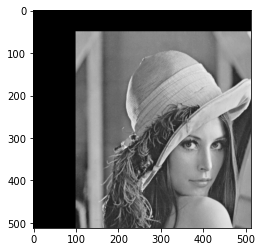

In [32]:
plt.imshow(translated_image,cmap='gray')
plt.show()

In [33]:
def scale(image,scale_x,scale_y):
    scaled_image=np.zeros((int(image.shape[0]*scale_y),int(image.shape[1]*scale_x)))
    rows,cols=image.shape
    for i in range(scaled_image.shape[0]):
        for j in range(scaled_image.shape[1]):
            if 0<= i/scale_y <rows and 0<= j/scale_x <cols:
                scaled_image[i][j]=image[int(i/scale_y)][int(j/scale_x)]
    return scaled_image

In [18]:
scaled_image=scale(image1,1,2)

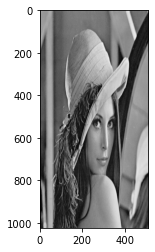

In [19]:
plt.imshow(scaled_image,cmap='gray')
plt.show()

In [34]:
def image_rotation(image, angle):
    rows, cols = image.shape
    cos_theta = math.cos(math.radians(angle))
    sin_theta = math.sin(math.radians(angle))
    new_rows = int(abs(rows * cos_theta) + abs(cols * sin_theta))
    new_cols = int(abs(cols * cos_theta) + abs(rows * sin_theta))
    rotated_image = np.zeros((new_rows, new_cols), dtype=np.uint8)
    center_x = rows / 2
    center_y = cols / 2
    middle_x = new_rows / 2
    middle_y = new_cols / 2
    for i in range(new_rows):
        for j in range(new_cols):
            original_i = int((i - middle_x) * cos_theta + (j - middle_y) * sin_theta + center_x)
            original_j = int(-(i - middle_x) * sin_theta + (j - middle_y) * cos_theta + center_y)
            if 0 <= original_i < rows and 0 <= original_j < cols:
                rotated_image[i, j] = image[original_i, original_j]
    return rotated_image


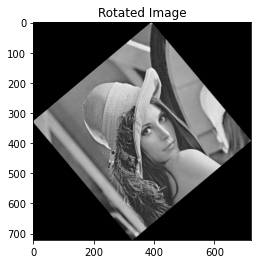

In [35]:
rotated_image = image_rotation(image1, 40)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated Image')
plt.show()

In [36]:
def image_shear(image, shear_factor, axis):
    rows, cols = image.shape
    if axis == 'x':
        shear_matrix = np.array([[1, shear_factor], [0, 1]])
    else:
        shear_matrix = np.array([[1, 0], [shear_factor, 1]])

    new_rows,new_cols = np.dot(shear_matrix, [rows, cols])
    sheared_image = np.zeros((int(new_rows), int(new_cols)), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_i, new_j = np.dot(shear_matrix, [i, j])
            if 0 <= new_i < new_rows and 0 <= new_j < new_cols:
                sheared_image[int(new_i), int(new_j)] = image[i, j]
    return sheared_image    

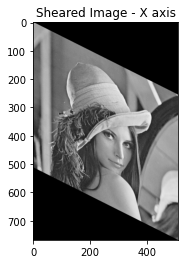

In [38]:
sheared_image_x = image_shear(image1, 0.5, 'x')
plt.imshow(sheared_image_x, cmap='gray')
plt.title('Sheared Image - X axis')
plt.show()

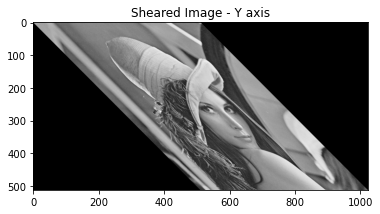

In [39]:
sheared_image_y = image_shear(image1, 1, 'y')
plt.imshow(sheared_image_y, cmap='gray')
plt.title('Sheared Image - Y axis')
plt.show()